In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('gdrive/My Drive/Stemanities/data/ss13pus_no_na.csv')

In [0]:
def assign_class(row):
  if(row['ESR'] == 1 or row['ESR'] == 4): #employed 
    return 1
  elif(row['ESR'] == 3 or row['ESR'] == 6): #unemployed
    return 0

In [0]:
df = df[(df['ESR'] == 1) | (df['ESR'] == 4) | (df['ESR'] == 3) | (df['ESR'] == 6)]
len(df.index)

2394087

In [0]:
df['class'] = df.apply(lambda row: assign_class(row), axis=1)
df.head()

,RAC1P,RAC2P,RAC3P,RACBLK,RACWHT,LANP,POBP,WAOB,AGEP,SEX,ESR,SCHL,POVPIP,WAGP,HICOV,FPAP,SSP,SSIP,PUBCOV,HINS3,HINS4,class
0,2,2,2,1,0,0.0,1,1,55,2,1.0,20.0,501.0,52000.0,1,0,0.0,0.0,2,2,2,1
1,2,2,2,1,0,0.0,1,1,56,1,1.0,16.0,501.0,0.0,1,0,0.0,0.0,2,2,2,1
2,2,2,2,1,0,0.0,1,1,21,1,6.0,19.0,501.0,0.0,1,0,0.0,0.0,2,2,2,0
3,2,2,2,1,0,0.0,1,1,21,2,6.0,19.0,501.0,0.0,1,0,0.0,0.0,2,2,2,0
4,2,2,2,1,0,0.0,1,1,63,2,1.0,21.0,330.0,39000.0,1,1,930.0,0.0,2,2,2,1


In [0]:
df = df.drop(columns=['RAC2P', 'RAC3P', 'RACBLK', 'RACWHT', 'POBP', 'WAOB', 'SCHL', 'FPAP', 'WAGP', 'POBP', 'POVPIP']) # Removing Wage and POBP and POVPIP
df.head()

,RAC1P,LANP,AGEP,SEX,ESR,HICOV,SSP,SSIP,PUBCOV,HINS3,HINS4,class
0,2,0.0,55,2,1.0,1,0.0,0.0,2,2,2,1
1,2,0.0,56,1,1.0,1,0.0,0.0,2,2,2,1
2,2,0.0,21,1,6.0,1,0.0,0.0,2,2,2,0
3,2,0.0,21,2,6.0,1,0.0,0.0,2,2,2,0
4,2,0.0,63,2,1.0,1,930.0,0.0,2,2,2,1


In [0]:

df_rac1p = pd.get_dummies(df['RAC1P'])
df_rac1p.columns = ['RAC1P_1', 'RAC1P_2', 'RAC1P_3', 'RAC1P_4', 'RAC1P_5', 'RAC1P_6', 'RAC1P_7' ,'RAC1P_8', 'RAC1P_9']
df_rac1p.head()


,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [0]:
df_lanp = pd.get_dummies(df['LANP'])
df_lanp.columns = ['LANP_' + str(col) for col in df_lanp.columns]
df_lanp.head()

,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,LANP_657.0,LANP_658.0,LANP_662.0,LANP_663.0,...,LANP_728.0,LANP_732.0,LANP_739.0,LANP_742.0,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df = pd.concat([df, df_rac1p], axis=1)
df = pd.concat([df, df_lanp], axis=1)
df.head()

,RAC1P,LANP,AGEP,SEX,ESR,HICOV,SSP,SSIP,PUBCOV,HINS3,HINS4,class,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,...,LANP_728.0,LANP_732.0,LANP_739.0,LANP_742.0,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0
0,2,0.0,55,2,1.0,1,0.0,0.0,2,2,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.0,56,1,1.0,1,0.0,0.0,2,2,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0.0,21,1,6.0,1,0.0,0.0,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0.0,21,2,6.0,1,0.0,0.0,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0.0,63,2,1.0,1,930.0,0.0,2,2,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_final = df.drop(columns=['RAC1P', 'LANP'])
df_final.head()

,AGEP,SEX,ESR,HICOV,SSP,SSIP,PUBCOV,HINS3,HINS4,class,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,...,LANP_728.0,LANP_732.0,LANP_739.0,LANP_742.0,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0
0,55,2,1.0,1,0.0,0.0,2,2,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56,1,1.0,1,0.0,0.0,2,2,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,1,6.0,1,0.0,0.0,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,2,6.0,1,0.0,0.0,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,63,2,1.0,1,930.0,0.0,2,2,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def zero_one(val):
  if(val == 2):
    return 0 #no (or f)
  return 1 #yes (or m)

In [0]:
df_final ['PUBCOV'] = df_final['PUBCOV'].apply(lambda x: zero_one(x))
df_final ['HINS3'] = df_final['HINS3'].apply(lambda x: zero_one(x))
df_final ['HINS4'] = df_final['HINS4'].apply(lambda x: zero_one(x))
df_final ['SEX'] = df_final['SEX'].apply(lambda x: zero_one(x))
df_final.head()

,AGEP,SEX,ESR,HICOV,SSP,SSIP,PUBCOV,HINS3,HINS4,class,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,...,LANP_728.0,LANP_732.0,LANP_739.0,LANP_742.0,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0
0,55,0,1.0,1,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56,1,1.0,1,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,1,6.0,1,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,6.0,1,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,63,0,1.0,1,930.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y = df_final['class']
x = df_final[df_final.columns.difference(['class', 'ESR'])]
x_copy = x
x.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,SEX,SSIP,SSP
0,55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
1,56,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
2,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
3,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
4,63,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,930.0


In [0]:
x_copy.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,SEX,SSIP,SSP
0,55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
1,56,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
2,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
3,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
4,63,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,930.0


In [0]:
x = x.drop(columns=['RAC1P_1',	'RAC1P_2',	'RAC1P_3',	'RAC1P_4',	'RAC1P_5',	'RAC1P_6',	'RAC1P_7',	'RAC1P_8',	'RAC1P_9'])
x.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,SEX,SSIP,SSP
0,55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,56,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0
2,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0
3,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
4,63,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,930.0


In [0]:
x_copy.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,SEX,SSIP,SSP
0,55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
1,56,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
2,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
3,21,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
4,63,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,930.0


In [0]:
y = pd.DataFrame(y, columns=['class'])
y.head()

,class
0,1
1,1
2,0
3,0
4,1


In [0]:
#imports
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pickle

In [0]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_copy = pd.DataFrame(scaler.fit_transform(x_copy), columns=x_copy.columns)
x.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,SEX,SSIP,SSP
0,0.493671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.506329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000
2,0.063291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000
3,0.063291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.594937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0186


In [0]:
x_copy.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,SEX,SSIP,SSP
0,0.493671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.506329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000
2,0.063291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000
3,0.063291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.594937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0186


In [0]:
# hide away the test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13, shuffle=True)

X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(x_copy,y, test_size=0.3, random_state=13, shuffle=True)

In [0]:
X_test_copy.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_8,RAC1P_9,SEX,SSIP,SSP
1961171,0.556962,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207814,0.303797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
219534,0.075949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1658843,0.392405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1320604,0.620253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
X_test.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,SEX,SSIP,SSP
1961171,0.556962,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207814,0.303797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
219534,0.075949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658843,0.392405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1320604,0.620253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
y_test_copy.head()

,class
1985077,0
210463,1
222393,0
1679360,1
1336856,1


In [0]:
y_test.head()

,class
1985077,0
210463,1
222393,0
1679360,1
1336856,1


In [0]:
scoresLR = []
lr = LogisticRegression()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)
i = 1
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
for train_index, test_index in cv.split(X_train, y_train):
  X_train_cv, X_test_cv, y_train_cv, y_test_cv = X_train.loc[train_index], X_train.loc[test_index], y_train.loc[train_index], y_train.loc[test_index]
  print('KFold {}, fitting'.format(i))
  lr.fit(X_train_cv, y_train_cv)

  print('KFold {}, scoring'.format(i))
  scoreLR = f1_score(y_test_cv, lr.predict(X_test_cv))
  print('F1 score LR: {}'.format(scoreLR))
  scoresLR.append(scoreLR)

  i += 1

NameError: ignored

In [0]:
with open('gdrive/My Drive/Stemanities/lr.pkl', 'wb') as fid:
    pickle.dump(lr, fid)

In [0]:
f1_score(y_test, lr.predict(X_test))

NameError: ignored

In [0]:
"""
scoresXGB = []
xgb = XGBClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)
i = 1
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
for train_index, test_index in cv.split(X_train, y_train):
  X_train_cv, X_test_cv, y_train_cv, y_test_cv = X_train.loc[train_index], X_train.loc[test_index], y_train.loc[train_index], y_train.loc[test_index]
  print('KFold {}, fitting'.format(i))
  xgb.fit(X_train_cv, y_train_cv)

  print('KFold {}, scoring'.format(i))
  scoreXGB = f1_score(y_test_cv, xgb.predict(X_test_cv))
  print('F1 score XGB: {}'.format(scoreXGB))
  scoresXGB.append(scoreXGB)

  i += 1

  """

"\nscoresXGB = []\nxgb = XGBClassifier()\ncv = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)\ni = 1\nX_train = X_train.reset_index(drop=True)\ny_train = y_train.reset_index(drop=True)\nfor train_index, test_index in cv.split(X_train, y_train):\n  X_train_cv, X_test_cv, y_train_cv, y_test_cv = X_train.loc[train_index], X_train.loc[test_index], y_train.loc[train_index], y_train.loc[test_index]\n  print('KFold {}, fitting'.format(i))\n  xgb.fit(X_train_cv, y_train_cv)\n\n  print('KFold {}, scoring'.format(i))\n  scoreXGB = f1_score(y_test_cv, xgb.predict(X_test_cv))\n  print('F1 score XGB: {}'.format(scoreXGB))\n  scoresXGB.append(scoreXGB)\n\n  i += 1\n\n  "

In [0]:
"""
with open('gdrive/My Drive/Stemanities/xgb.pkl', 'wb') as fid:
    pickle.dump(xgb, fid)
f1_score(y_test, xgb.predict(X_test))

"""

"\nwith open('gdrive/My Drive/Stemanities/xgb.pkl', 'wb') as fid:\n    pickle.dump(xgb, fid)\nf1_score(y_test, xgb.predict(X_test))\n\n"

In [0]:
"""

scoresSVC = []
svc = SVC()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)
i = 1
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
for train_index, test_index in cv.split(X_train, y_train):
  X_train_cv, X_test_cv, y_train_cv, y_test_cv = X_train.loc[train_index], X_train.loc[test_index], y_train.loc[train_index], y_train.loc[test_index]
  print('KFold {}, fitting'.format(i))
  svc.fit(X_train_cv, y_train_cv)

  print('KFold {}, scoring'.format(i))
  scoreSVC = f1_score(y_test_cv, svc.predict(X_test_cv))
  print('F1 score SVC: {}'.format(scoreSVC))
  scoresSVC.append(scoreSVC)

  i += 1

  """

"\n\nscoresSVC = []\nsvc = SVC()\ncv = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)\ni = 1\nX_train = X_train.reset_index(drop=True)\ny_train = y_train.reset_index(drop=True)\nfor train_index, test_index in cv.split(X_train, y_train):\n  X_train_cv, X_test_cv, y_train_cv, y_test_cv = X_train.loc[train_index], X_train.loc[test_index], y_train.loc[train_index], y_train.loc[test_index]\n  print('KFold {}, fitting'.format(i))\n  svc.fit(X_train_cv, y_train_cv)\n\n  print('KFold {}, scoring'.format(i))\n  scoreSVC = f1_score(y_test_cv, svc.predict(X_test_cv))\n  print('F1 score SVC: {}'.format(scoreSVC))\n  scoresSVC.append(scoreSVC)\n\n  i += 1\n\n  "

In [0]:
from sklearn.metrics import classification_report

clf_lr = pickle.load(open('gdrive/My Drive/Stemanities/lr.pkl', 'rb'))

print(confusion_matrix(y_test, clf_lr.predict(X_test)))

print("Accuracy", accuracy_score(y_test, clf_lr.predict(X_test)))
print(classification_report(y_test, clf_lr.predict(X_test)))


[[192696 115772]
 [ 51793 357966]]
Accuracy 0.7666963230287918
              precision    recall  f1-score   support

           0       0.79      0.62      0.70    308468
           1       0.76      0.87      0.81    409759

    accuracy                           0.77    718227
   macro avg       0.77      0.75      0.75    718227
weighted avg       0.77      0.77      0.76    718227



In [0]:
#bar graphs
clf_lr = pickle.load(open('gdrive/My Drive/Stemanities/lr.pkl', 'rb'))

y_pred = clf_lr.predict(X_test)


print(len(y_pred))
print(len(X_test))


X_test.head()

"""
print(X_test.iloc[1].get('AGEP'),X_test.iloc[1].get('HICOV'), X_test.iloc[1].get('WAGP'), X_test.iloc[1].get('SEX'), X_test.iloc[1].get('RAC1P_1'))
X_test.head()
"""

718227
718227


"\nprint(X_test.iloc[1].get('AGEP'),X_test.iloc[1].get('HICOV'), X_test.iloc[1].get('WAGP'), X_test.iloc[1].get('SEX'), X_test.iloc[1].get('RAC1P_1'))\nX_test.head()\n"

In [0]:
len(y_pred)

In [0]:
# race distribution (actual data)

whiteTotal_ue, blackTotal_ue, otherTotal_ue, whiteTotal_e, blackTotal_e, otherTotal_e = 0,0,0,0,0,0

for i in range(0, len(X_test)):
  employed = y_test.iloc[i].get('class')
  white = X_test.iloc[i].get('RAC1P_1')
  black = X_test.iloc[i].get('RAC1P_2')
  if employed == 0:
    if white == 1:
      whiteTotal_ue += 1
    elif black == 1:
      blackTotal_ue += 1
    else:
      otherTotal_ue += 1
  else:
    if white == 1:
      whiteTotal_e += 1
    elif black == 1:
      blackTotal_e += 1
    else:
      otherTotal_e += 1

print(whiteTotal_ue, blackTotal_ue, otherTotal_ue, whiteTotal_e, blackTotal_e, otherTotal_e)



#df_employed =  y_test[y_test['class'] == 1]
#df_unemployed = y_test[y_test['class'] == 0]

#df_employed.head()

0 0 308468 0 0 409759


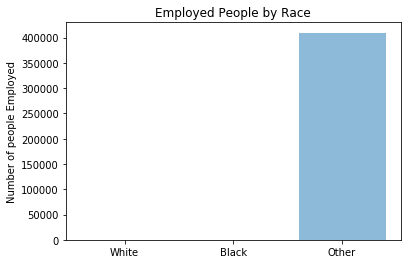

In [0]:
# Employed by race (actual distribution)

race = ('White', 'Black', 'Other')
y_pos = np.arange(len(race))
performance = [whiteTotal_e, blackTotal_e, otherTotal_e]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, race)pk
plt.ylabel('Number of people Employed')
plt.title('Employed People by Race')

plt.show()



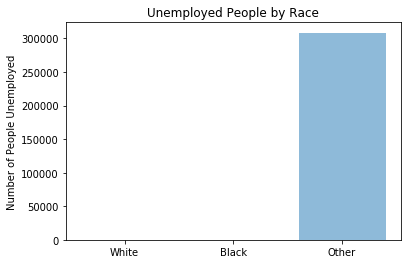

In [0]:
# Unemployed by race (actual distribution)


race = ('White', 'Black', 'Other')
y_pos = np.arange(len(race))
performance = [whiteTotal_ue, blackTotal_ue, otherTotal_ue]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, race)
plt.ylabel('Number of People Unemployed')
plt.title('Unemployed People by Race')

plt.show()


In [0]:
print(y_pred[0], y_pred[1], y_pred[2])

1 1 1


In [0]:
X_test_copy.head()

,AGEP,HICOV,HINS3,HINS4,LANP_0.0,LANP_601.0,LANP_602.0,LANP_607.0,LANP_608.0,LANP_609.0,LANP_610.0,LANP_611.0,LANP_614.0,LANP_615.0,LANP_616.0,LANP_619.0,LANP_620.0,LANP_622.0,LANP_623.0,LANP_624.0,LANP_625.0,LANP_629.0,LANP_631.0,LANP_635.0,LANP_637.0,LANP_638.0,LANP_639.0,LANP_641.0,LANP_642.0,LANP_645.0,LANP_646.0,LANP_647.0,LANP_648.0,LANP_649.0,LANP_650.0,LANP_651.0,LANP_653.0,LANP_654.0,LANP_655.0,LANP_656.0,...,LANP_743.0,LANP_744.0,LANP_746.0,LANP_750.0,LANP_752.0,LANP_761.0,LANP_767.0,LANP_768.0,LANP_776.0,LANP_777.0,LANP_778.0,LANP_779.0,LANP_780.0,LANP_783.0,LANP_791.0,LANP_792.0,LANP_793.0,LANP_794.0,LANP_796.0,LANP_799.0,LANP_806.0,LANP_819.0,LANP_862.0,LANP_864.0,LANP_907.0,LANP_924.0,LANP_933.0,LANP_964.0,LANP_985.0,LANP_986.0,LANP_988.0,LANP_989.0,LANP_990.0,LANP_992.0,LANP_993.0,LANP_994.0,PUBCOV,SEX,SSIP,SSP
1961171,0.556962,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207814,0.303797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
219534,0.075949,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658843,0.392405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1320604,0.620253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
# race distribution (predicted data)

whiteTotal_ue, blackTotal_ue, otherTotal_ue, whiteTotal_e, blackTotal_e, otherTotal_e = 0,0,0,0,0,0

for i in range(0, len(X_test)):
  employed = y_pred[i]
  white = X_test_copy.iloc[i].get('RAC1P_1')
  black = X_test_copy.iloc[i].get('RAC1P_2')
  if employed == 0:
    if white == 1:
      whiteTotal_ue += 1
    elif black == 1:
      blackTotal_ue += 1
    else:
      otherTotal_ue += 1
  else:
    if white == 1:
      whiteTotal_e += 1
    elif black == 1:
      blackTotal_e += 1
    else:
      otherTotal_e += 1

print(whiteTotal_ue, blackTotal_ue, otherTotal_ue, whiteTotal_e, blackTotal_e, otherTotal_e)



#df_employed =  y_test[y_test['class'] == 1]
#df_unemployed = y_test[y_test['class'] == 0]

#df_employed.head()

191913 29064 23512 373804 41844 58090


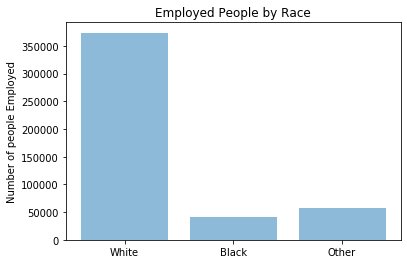

In [0]:
# Employed by race (predicted distribution)
race = ('White', 'Black', 'Other')
y_pos = np.arange(len(race))
performance = [whiteTotal_e, blackTotal_e, otherTotal_e]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, race)
plt.ylabel('Number of people Employed')
plt.title('Employed People by Race')

plt.show()

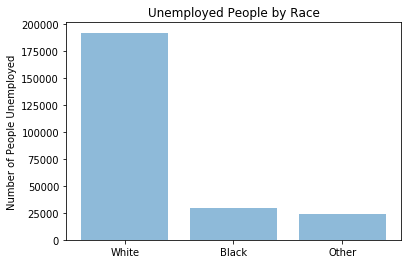

In [0]:
# Unemployed by race (predicted distribution)
race = ('White', 'Black', 'Other')
y_pos = np.arange(len(race))
performance = [whiteTotal_ue, blackTotal_ue, otherTotal_ue]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, race)
plt.ylabel('Number of People Unemployed')
plt.title('Unemployed People by Race')

plt.show()

In [0]:


clf_xgb = pickle.load(open('gdrive/My Drive/Stemanities/xgb.pkl', 'rb'))
print(confusion_matrix(y_test, clf_xgb.predict(X_test)))
print("Accuracy", accuracy_score(y_test, clf_xgb.predict(X_test)))
print(classification_report(y_test, clf_xgb.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


ValueError: ignored